In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
from sklearn.neighbors import KernelDensity
import os
import decimal
from math import log
import copy
import matplotlib.pyplot as plt

In [3]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)
X_train, y_train = digits.data , digits.target
X_train

Image Data Shape (1797, 64)
Label Data Shape (1797,)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=16,whiten=False)
pca2 = PCA(n_components=26,whiten=False)
pca3 = PCA(n_components=36,whiten=False)

In [6]:
pca1

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
X_transformed1 = pca1.fit_transform(X_train)
X_transformed2 = pca2.fit_transform(X_train)
X_transformed3 = pca3.fit_transform(X_train)

In [8]:
X_transformed1.shape

(1797, 16)

In [9]:
# import numpy as np 
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,4))
# for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
#     plt.subplot(1, 5, index + 1)
#     plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
#     plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
#kernel density estimation for PCA with 16 features

from sklearn.model_selection import GridSearchCV

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid1 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)
grid1.fit(X_transformed1)
bandwidth1 = grid1.best_params_['bandwidth']
kernel1 = grid1.best_estimator_

/home/vagupta/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [11]:
print(bandwidth1,kernel1)

3.5938136638046276 KernelDensity(algorithm='auto', atol=0, bandwidth=3.5938136638046276,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


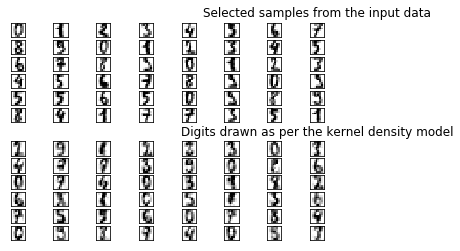

In [51]:

# sample 48 new points from the data
new_data = kernel1.sample(48, random_state=0)
new_data = pca1.inverse_transform(new_data)

# turn data into a 6*8 grid
new_data = new_data.reshape((6, 8, -1))
real_data = digits.data[:48].reshape((6, 8, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(13, 8, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(8):
    ax[6, j].set_visible(False)
    for i in range(6):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 7, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 7].set_title('Selected samples from the input data')
ax[7, 7].set_title('Digits drawn as per the kernel density model')

plt.show()

In [13]:
# from sklearn.neighbors import KernelDensity
# kde = KernelDensity(bandwidth=bandwidth1, kernel='gaussian')
# kde.fit(X_transformed1[:, None])

In [39]:
#kernel density estimation for PCA with 26 features

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid2 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)
grid2.fit(X_transformed2)
bandwidth2 = grid2.best_params_['bandwidth']
kernel2 = grid2.best_estimator_

/home/vagupta/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [41]:
print(bandwidth2,kernel2)

3.27454916287773 KernelDensity(algorithm='auto', atol=0, bandwidth=3.27454916287773,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


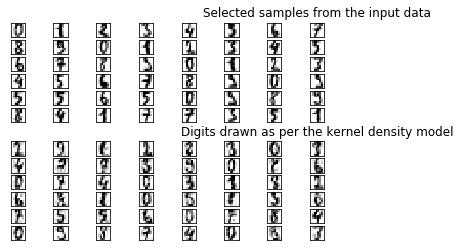

In [50]:
# sample 48 new points from the data
new_data = kernel2.sample(48, random_state=0)
new_data = pca2.inverse_transform(new_data)

# turn data into a 6*8 grid
new_data = new_data.reshape((6, 8, -1))
real_data = digits.data[:48].reshape((6, 8, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(13, 8, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(8):
    ax[6, j].set_visible(False)
    for i in range(6):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 7, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 7].set_title('Selected samples from the input data')
ax[7, 7].set_title('Digits drawn as per the kernel density model')

plt.show()

In [44]:
#kernel density estimation for PCA with 36 features

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid3 = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=5)
grid3.fit(X_transformed3)
bandwidth3 = grid3.best_params_['bandwidth']
kernel3 = grid3.best_estimator_

/home/vagupta/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
print(bandwidth3,kernel3)

2.7185882427329413 KernelDensity(algorithm='auto', atol=0, bandwidth=2.7185882427329413,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


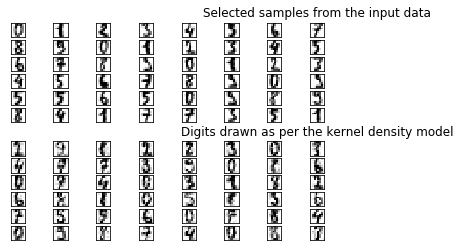

In [53]:
# sample 48 new points from the data
new_data = kernel3.sample(48, random_state=0)
new_data = pca3.inverse_transform(new_data)

# turn data into a 6*8 grid
new_data = new_data.reshape((6, 8, -1))
real_data = digits.data[:48].reshape((6, 8, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(13, 8, subplot_kw=dict(xticks=[], yticks=[]))
# fig.subplots_adjust(hspace=0.05, wspace=0.05)
for j in range(8):
    ax[6, j].set_visible(False)
    for i in range(6):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 7, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 7].set_title('Selected samples from the input data')
ax[7, 7].set_title('Digits drawn as per the kernel density model')

plt.show()